### **Code : Final Visualization_1**
- Writer : Donghyeon Kim
- Date : 2022.09.06.
- 대상 : 태양광 사용 가구 및 통합 데이터

<hr>

### **Prior Settings**

In [14]:
# 라이브러리 설정
import os
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 사용자 함수 호출
# get_project_root : 파일의 상위-상위 경로 호출
# get_name_root : 모든 사용자 이름 호출
# get_name_root_use : 태양광 사용자 이름 호출
# get_name_root_not : 태양광 미사용자 이름 호출
from pack_utils import get_project_root, get_name_root, get_name_root_use, kw_dict, kw_value_dict

<hr>

### **User-Defined Function**
- user : 사용자명
- data_x : x 변수
- data_y : y 변수
- x_label : x 변수 label
- y_label : y 변수 label
- x_lim1, x_lim2 : x 변수 구간
- y_lim1, y_lim2 : y 변수 구간

In [16]:
def scatter_plot_use(user, data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'{user} 태양광 사용 가구 : Scatter Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = folder_root + '\\' + f'{user}_final_merge_wt.xlsx'
    df_user = pd.read_excel(file_name)
    
    # Name Index
    all_name = get_name_root()
    idx = all_name.index(user) + 1
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(20, 24)})
    plt.suptitle(f'Scatter Plot between {y_label} and {x_label} for household No.{idx} site',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_user_filter = df_user[df_user.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_user_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_user_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_user_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_user_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_use')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    result_user_root = os.path.join(result_root, f'{user}')
    if not os.path.exists(result_user_root):
        os.makedirs(result_user_root)
    
    fig_name = os.path.join(result_user_root, f'{user}_{y_label}_{x_label}.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print(f'{user} 태양광 사용 가구 : Scatter Plot 종료')
    return

In [17]:
def boxplot_use(user, data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'{user} 태양광 사용 가구 : Box Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = folder_root + '/' + f'{user}_final_merge_wt.xlsx'
    df_user = pd.read_excel(file_name)
    
    # Name Index
    all_name = get_name_root()
    idx = all_name.index(user) + 1
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(20, 24)})
    plt.suptitle(f'Box Plot between {y_label} and {x_label} for household No.{idx} site',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_user_filter = df_user[df_user.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_use')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    result_user_root = os.path.join(result_root, f'{user}')
    if not os.path.exists(result_user_root):
        os.makedirs(result_user_root)
    
    fig_name = os.path.join(result_user_root, f'{user}_{y_label}_{x_label}.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print(f'{user} 태양광 사용 가구 : Box Plot 종료')
    return

In [18]:
def lineplot_use(user, data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'{user} 태양광 사용 가구 : Line Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = folder_root + '/' + f'{user}_final_merge_wt.xlsx'
    df_user = pd.read_excel(file_name)
    
    # Name Index
    all_name = get_name_root()
    idx = all_name.index(user) + 1
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(20, 24)})
    plt.suptitle(f'Line Plot between {y_label} and {x_label} for household No.{idx} site',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_user_filter = df_user[df_user.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_use')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    result_user_root = os.path.join(result_root, f'{user}')
    if not os.path.exists(result_user_root):
        os.makedirs(result_user_root)
    
    fig_name = os.path.join(result_user_root, f'{user}_{y_label}_{x_label}_line.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print(f'{user} 태양광 사용 가구 : Line Plot 종료')
    return

In [19]:
name_list_use = get_name_root_use()

<hr>

### **User-Defined Function 2**
- 통합 데이터를 다루기 위한 함수

In [20]:
def boxplot_use_all(data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'Box Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = os.path.join(folder_root, 'all_concat_hour.xlsx')
    df_all = pd.read_excel(file_name)
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(22, 26)})
    plt.suptitle(f'Box Plot between {y_label} and {x_label} for all household',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_all_filter = df_all[df_all.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_all')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    fig_name = os.path.join(result_root, f'All_{y_label}_{x_label}.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print('Box Plot 종료')
    return

In [21]:
def lineplot_use_all(data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'Line Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = os.path.join(folder_root, 'all_concat_hour.xlsx')
    df_all = pd.read_excel(file_name)
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(22, 26)})
    plt.suptitle(f'Line Plot between {y_label} and {x_label} for all household',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_all_filter = df_all[df_all.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_all')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    fig_name = os.path.join(result_root, f'All_{y_label}_{x_label}_line.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print('Line Plot 종료')
    return

In [22]:
def lineplot_use_all2(data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'Line Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = os.path.join(folder_root, 'all_concat_hour.xlsx')
    df_all = pd.read_excel(file_name)
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(22, 26)})
    plt.suptitle(f'Line Plot between {y_label} and {x_label} for all solar households',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_all_filter = df_all[df_all.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_use')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    fig_name = os.path.join(result_root, f'Use_{y_label}_{x_label}_line.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print('Line Plot 종료')
    return

In [23]:
def lineplot_use_all3(data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'Line Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = os.path.join(folder_root, 'all_concat_hour.xlsx')
    df_all = pd.read_excel(file_name)
    df_all_use = df_all[df_all.type == 'use']
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(22, 26)})
    plt.suptitle(f'Line Plot between {y_label} and {x_label} for all solar households',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_all_filter = df_all_use[df_all_use.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_use')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    fig_name = os.path.join(result_root, f'Use_{y_label}_{x_label}_line.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print('Line Plot 종료')
    return

<hr>

#### **자가발전량**

In [24]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_merge_wt_f')
file_name = os.path.join(folder_root, 'all_concat_day.xlsx')
df_all_day = pd.read_excel(file_name)

# Filtering
df_all_day_use = df_all_day[df_all_day.type == 'use']

In [25]:
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']
df_all_day_use2 = df_all_day_use[df_all_day_use.ym != '2021/3']
df_all_day_use_f = df_all_day_use2[df_all_day_use2.ym != '2022/4']

Text(0, 0.5, 'Generation Time')

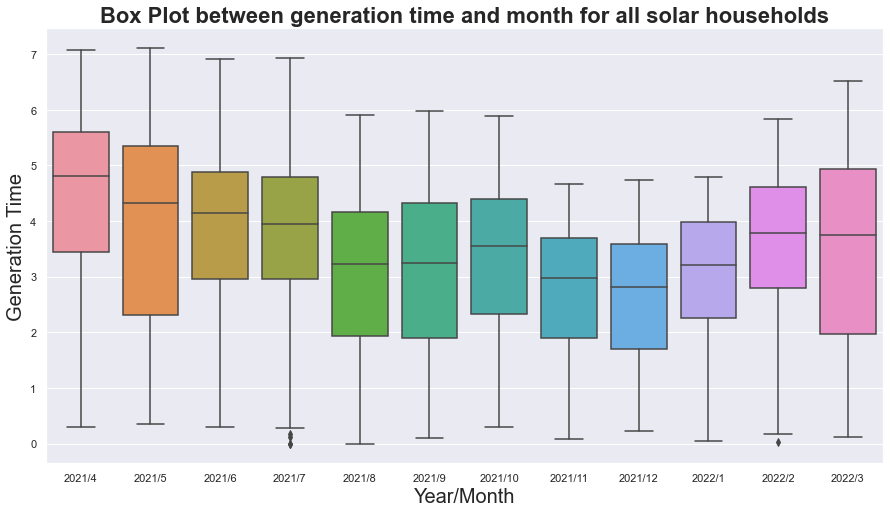

In [26]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(x='ym', y='발전시간', data=df_all_day_use_f)
plt.title(f'Box Plot between generation time and month for all solar households', fontsize=22, fontweight='bold')
plt.xlabel('Year/Month', fontsize=20)
plt.ylabel('Generation Time', fontsize=20)

# result_root = os.path.join(root, 'result_final_use')
# if not os.path.exists(result_root):
#     os.makedirs(result_root)
    
# fig_name = os.path.join(result_root, 'Use_Generation Time_YM.png')
# plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)

Text(0, 0.5, 'Using Rate')

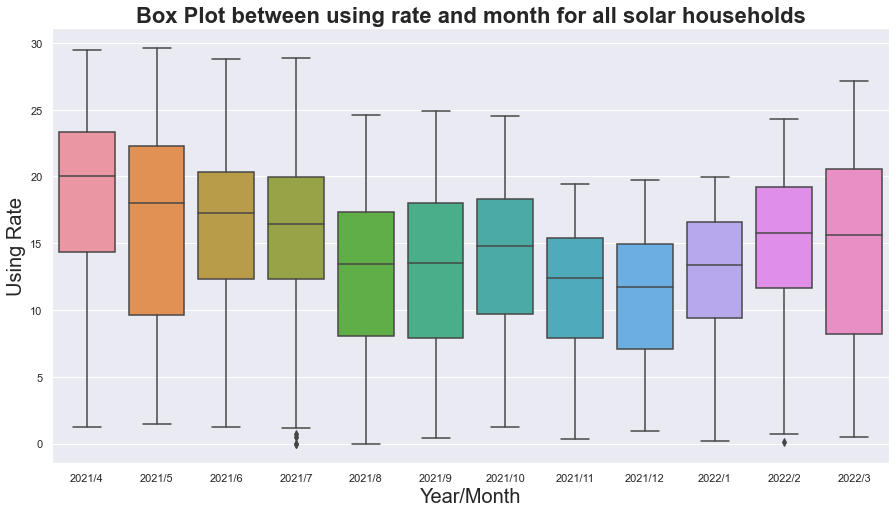

In [27]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(x='ym', y='이용률', data=df_all_day_use_f)
plt.title(f'Box Plot between using rate and month for all solar households', fontsize=22, fontweight='bold')
plt.xlabel('Year/Month', fontsize=20)
plt.ylabel('Using Rate', fontsize=20)

# result_root = os.path.join(root, 'result_final_use')
# if not os.path.exists(result_root):
#     os.makedirs(result_root)
    
# fig_name = os.path.join(result_root, 'Use_Using Rate_YM.png')
# plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)

In [28]:
df_all_day_use.groupby(['ym']).describe()['발전시간']

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/10,310.0,3.281029,1.390318,0.296170,2.322584,3.555054,4.385925,5.879964
2021/11,300.0,2.747654,1.196984,0.090007,1.887573,2.966756,3.701681,4.663330
2021/12,310.0,2.643077,1.137310,0.230062,1.706645,2.820204,3.584941,4.733480
2021/3,214.0,3.852084,1.718648,0.179999,3.069167,4.353325,5.174998,6.370036
2021/4,294.0,4.367257,1.654225,0.293335,3.440002,4.801663,5.605830,7.076640
2021/5,310.0,3.890825,1.850288,0.349996,2.309184,4.318338,5.349187,7.103353
2021/6,300.0,3.909740,1.472267,0.303345,2.964945,4.136703,4.878377,6.903239
2021/7,309.0,3.760035,1.437880,0.000000,2.956760,3.946615,4.786580,6.929932
2021/8,310.0,3.054670,1.447283,0.000000,1.931610,3.223348,4.165815,5.903320


In [29]:
df_all_day_use.groupby(['ym']).describe()['이용률']

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/10,310.0,13.670954,5.792991,1.234040,9.677435,14.812724,18.274689,24.499851
2021/11,300.0,11.448558,4.987432,0.375027,7.864889,12.361484,15.423669,19.430542
2021/12,310.0,11.012821,4.738793,0.958591,7.111020,11.750850,14.937252,19.722833
2021/3,214.0,16.050352,7.161032,0.749996,12.788195,18.138854,21.562492,26.541816
2021/4,294.0,18.196902,6.892604,1.222229,14.333344,20.006930,23.357624,29.485999
2021/5,310.0,16.211771,7.709532,1.458316,9.621599,17.993074,22.288280,29.597304
2021/6,300.0,16.290583,6.134445,1.263936,12.353939,17.236265,20.326572,28.763496
2021/7,309.0,15.666811,5.991165,0.000000,12.319833,16.444227,19.944085,28.874715
2021/8,310.0,12.727793,6.030347,0.000000,8.048375,13.430617,17.357561,24.597168


<hr>

#### **잉여전력량**

Line Plot 시작
Line Plot 종료


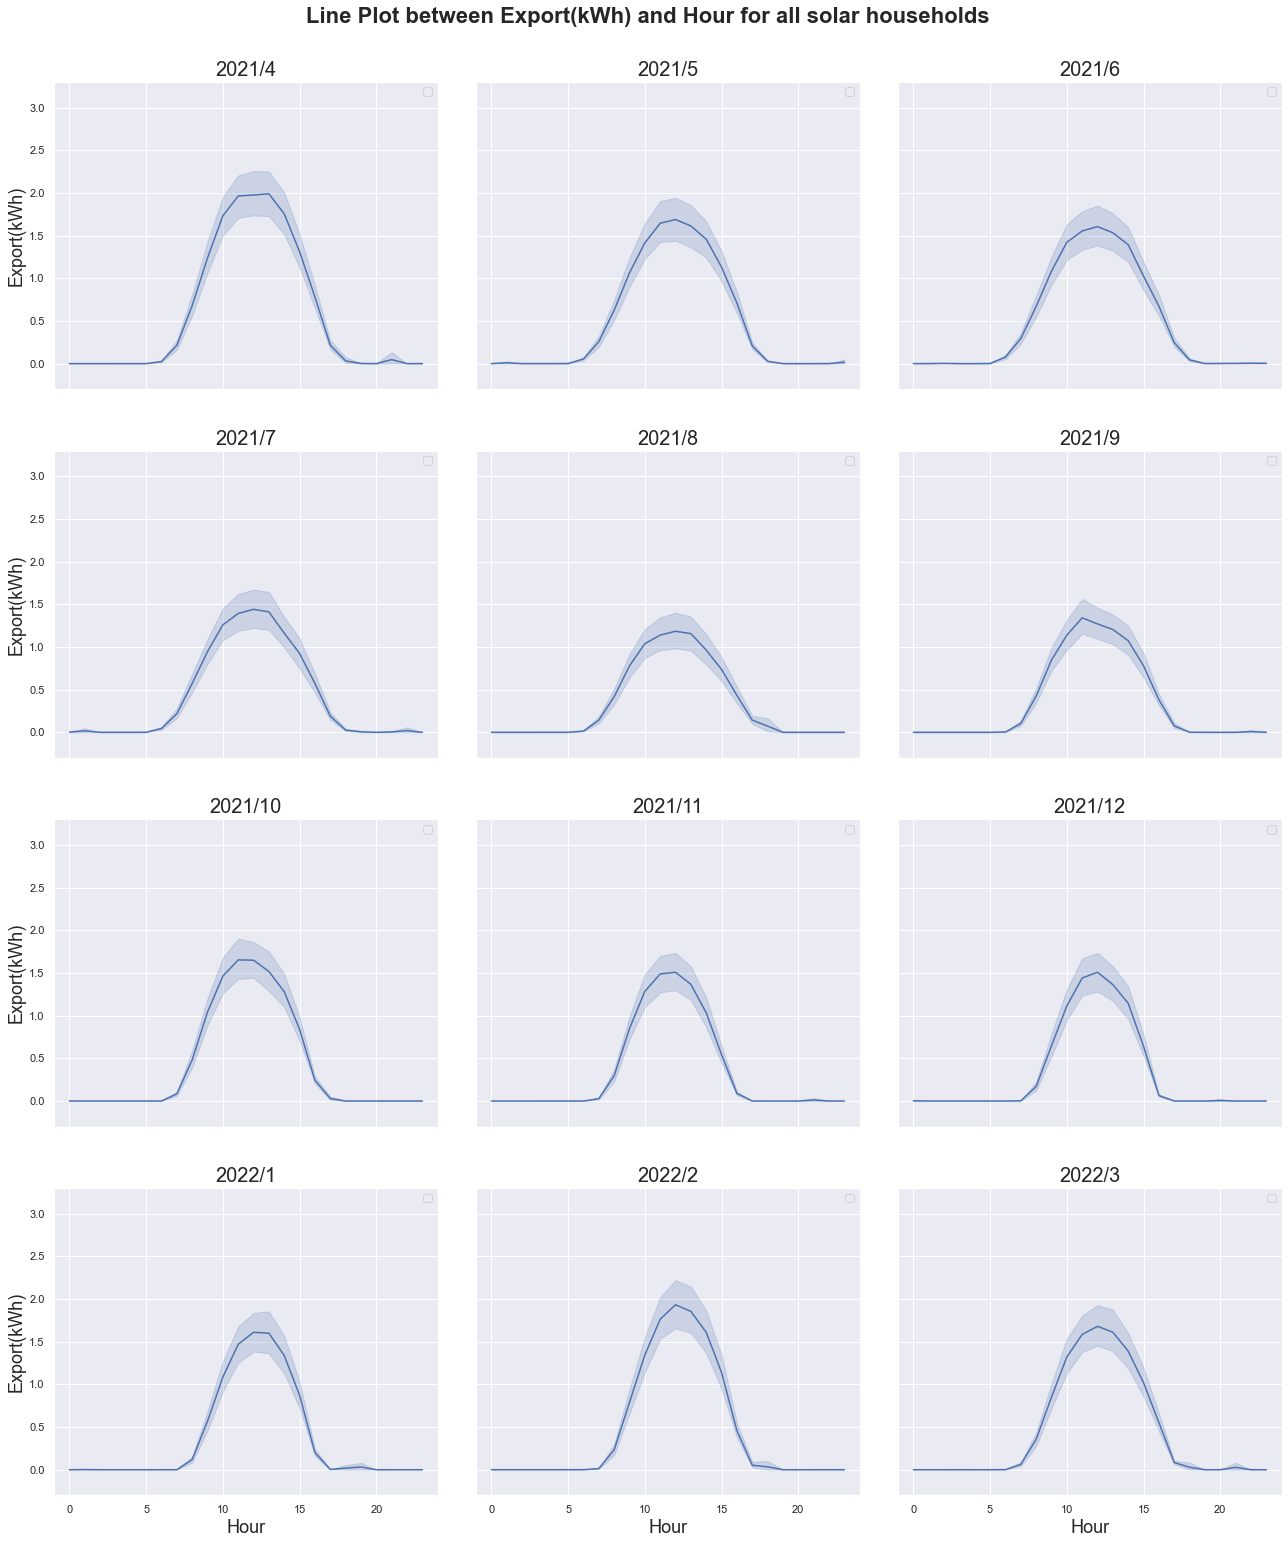

In [15]:
lineplot_use_all2('시간', '잉여전력량(kWh)', 'Hour', 'Export(kWh)', -1.0, 24.0, -0.3, 3.3)

In [30]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_merge_wt_f')
file_name = os.path.join(folder_root, 'all_concat_hour.xlsx')
df_all_hour = pd.read_excel(file_name)

# Filtering
df_all_hour_use = df_all_hour[df_all_hour.type == 'use']

In [31]:
pd.set_option('display.max_rows', 500)
df_all_hour_use.groupby(['ym', '시간']).describe()['잉여전력량(kWh)']

# 참고 #
# 잉여전력량(kWh)은 새벽과 저녁에는 0kWh임. 이에 따라, subtract() 오류가 발생하나, 이는 무시하여도 상관없음.

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4489: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-pack

count      mean       std  min       25%       50%       75%  \
ym      시간                                                                 
2021/10 0   307.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        1   302.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        2   303.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        3   301.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        4   302.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        5   303.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        6   301.0  0.000165  0.001526  0.0  0.000000  0.000000  0.000000   
        7   302.0  0.088758  0.247732  0.0  0.000000  0.000000  0.020020   
        8   306.0  0.488228  0.936165  0.0  0.000000  0.190033  0.440033   
        9   307.0  1.061099  1.587696  0.0  0.095032  0.670044  1.149963   
        10  305.0  1.482597  2.032539  0.0  0.220093  1.129883  1.629883   
        11  302.0  1.693514  2.235080  0.0  0.400116  1.355011  1.770020   
        12  301.0  1.693397  2.201873  0.0  0.290039  1.339966  1.829956   
        13  302.0  1.555159  2.101684  0.0  0.269913  1.225037  1.667450   
        14  306.0  1.314589  1.885240  0.0  0.142487  0.909973  1.410034   
        15  303.0  0.866114  1.366492  0.0  0.030029  0.510010  1.000000   
        16  304.0  0.251411  0.423854  0.0  0.000000  0.044983  0.359985   
        17  306.0  0.031699  0.219035  0.0  0.000000  0.000000  0.000000   
        18  305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        19  305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        20  306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        21  300.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        22  305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        23  306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
2021/11 0   294.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        1   295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        2   297.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        3   295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        4   295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        5   296.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        6   295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        7   292.0  0.030268  0.107807  0.0  0.000000  0.000000  0.000000   
        8   292.0  0.308383  0.701329  0.0  0.000000  0.059937  0.199951   
        9   298.0  0.877118  1.305017  0.0  0.059937  0.550049  0.939941   
        10  299.0  1.325547  1.789532  0.0  0.260010  0.979980  1.389893   
        11  295.0  1.550412  2.078351  0.0  0.344971  1.170044  1.635010   
        12  293.0  1.566561  2.114829  0.0  0.309937  1.140015  1.640015   
        13  295.0  1.418745  2.007674  0.0  0.150024  1.010010  1.500000   
        14  295.0  1.070844  1.616888  0.0  0.089905  0.660034  1.169922   
        15  296.0  0.564965  0.994842  0.0  0.010010  0.220123  0.622589   
        16  299.0  0.094110  0.217311  0.0  0.000000  0.000000  0.100098   
        17  296.0  0.000066  0.000801  0.0  0.000000  0.000000  0.000000   
        18  294.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        19  295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        20  297.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        21  295.0  0.012814  0.220082  0.0  0.000000  0.000000  0.000000   
        22  295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        23  293.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
2021/12 0   305.0  0.002885  0.050389  0.0  0.000000  0.000000  0.000000   
        1   304.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
        2   306.0  0.000000  0.000000  0.0  0.000000  0.0000

<hr>

#### **수전 전력량**

Line Plot 시작
Line Plot 종료


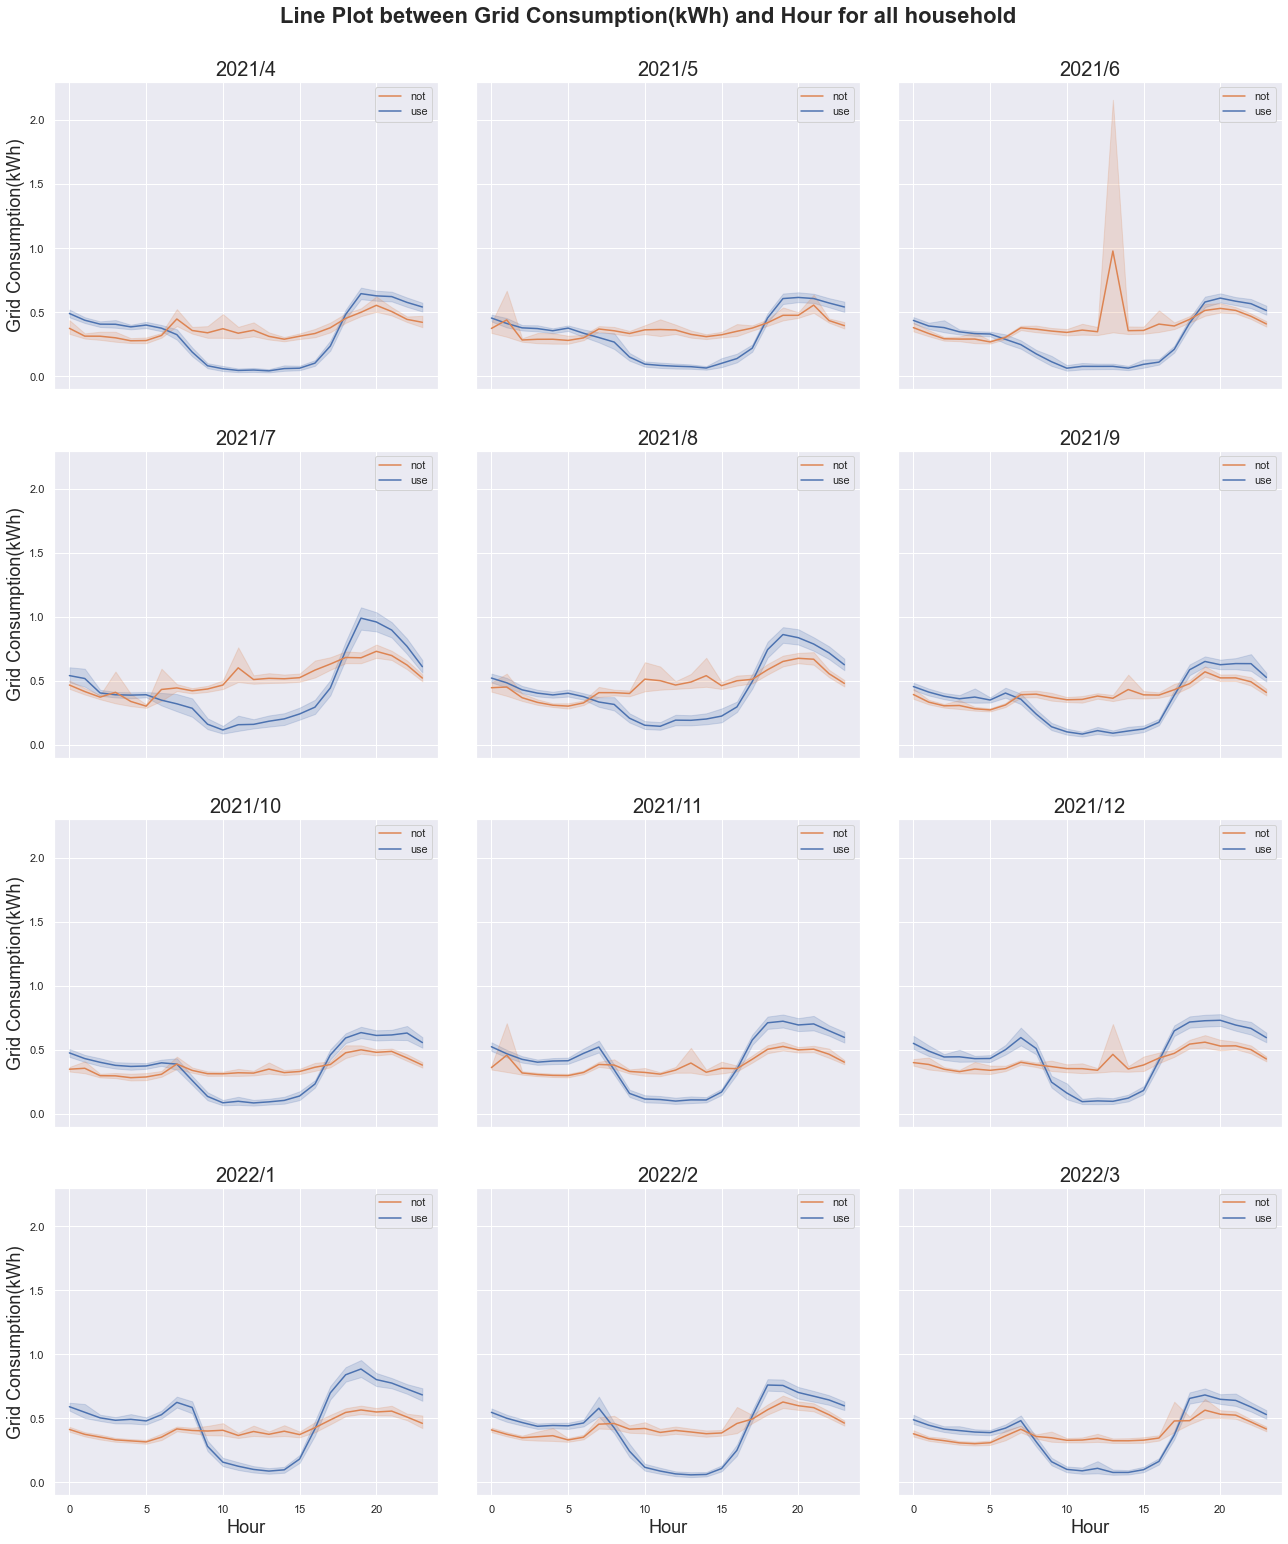

In [21]:
lineplot_use_all('시간', '수전전력량(kWh)', 'Hour', 'Grid Consumption(kWh)', -1.0, 24.0, -0.1, 2.3)

<hr>

#### **자가소비율(SCR)**

Line Plot 시작
Line Plot 종료


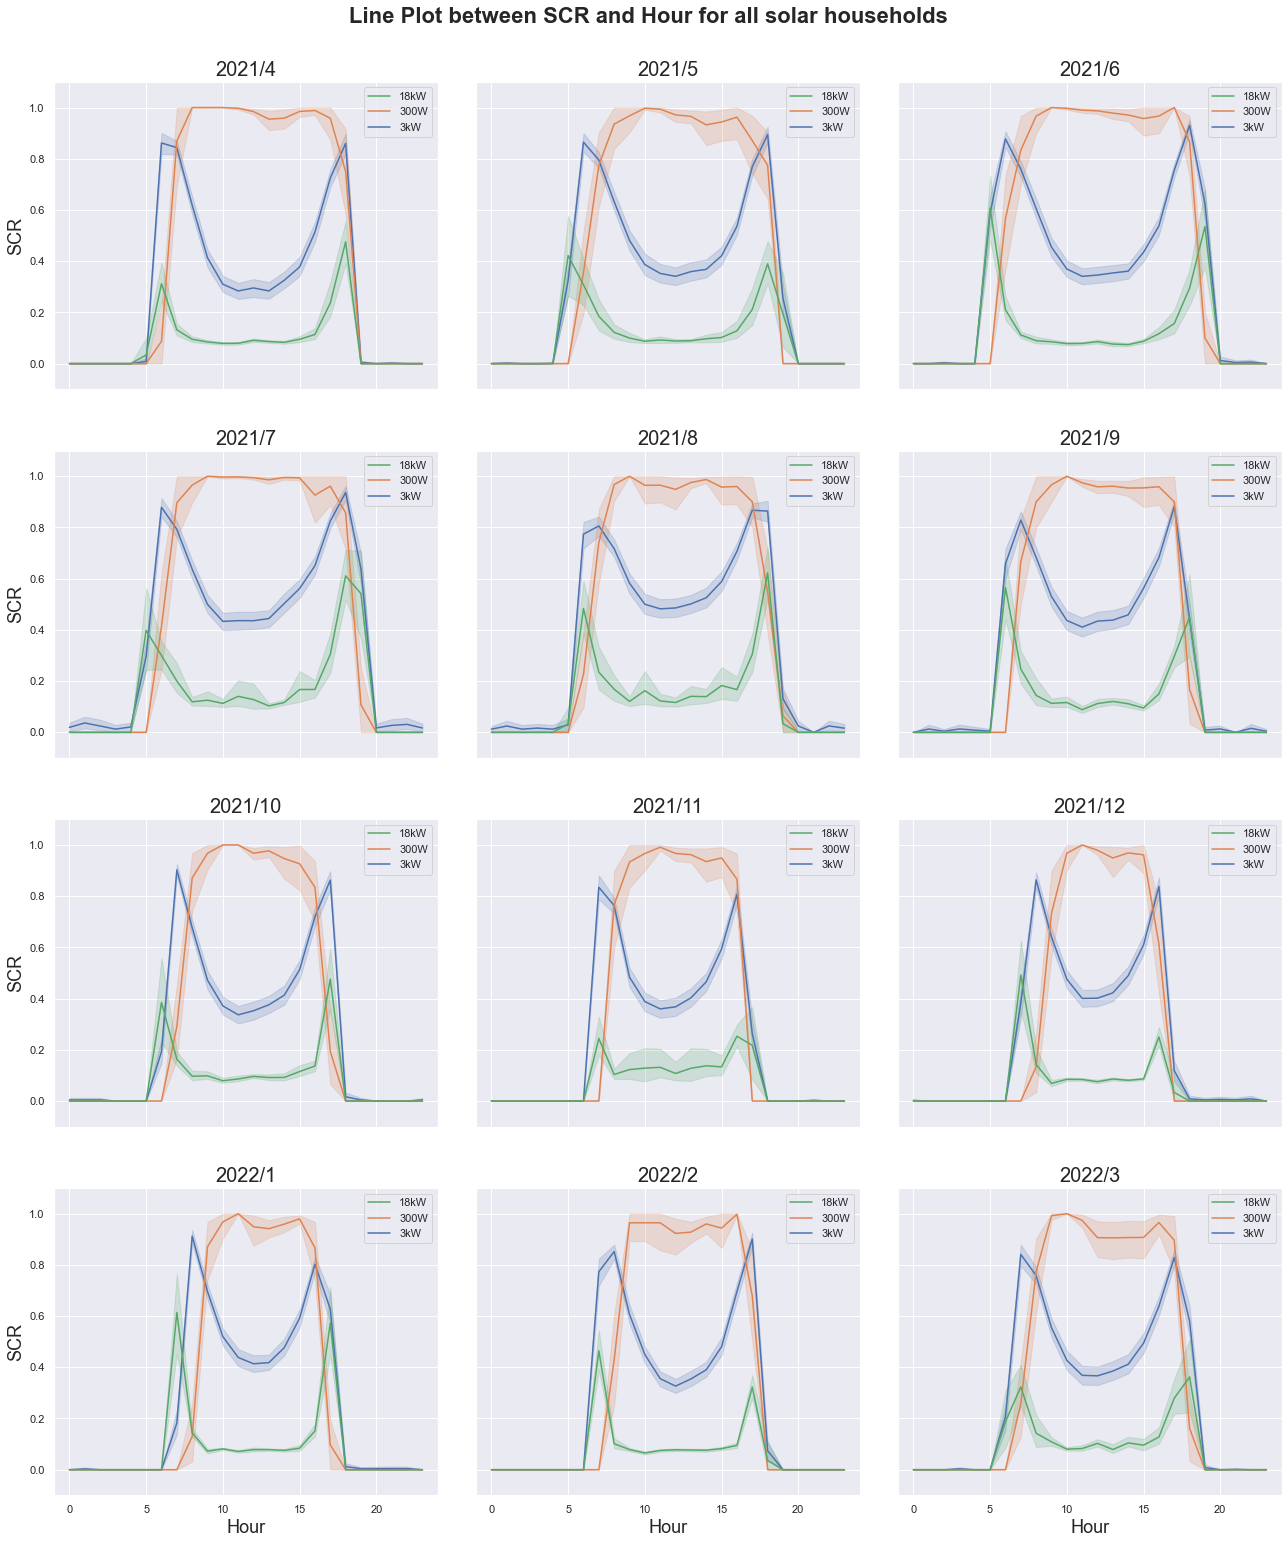

In [17]:
lineplot_use_all3('시간', '자가소비율', 'Hour', 'SCR', -1.0, 24.0, -0.1, 1.1)

In [32]:
df_all_hour_use.groupby(['ym', '설비용량(kW)']).describe()['자가소비율']

count      mean       std  min  25%       50%       75%  \
ym      설비용량(kW)                                                             
2021/10 18kW       744.0  0.079822  0.170330  0.0  0.0  0.000000  0.093716   
        300W       743.0  0.374483  0.481135  0.0  0.0  0.000000  1.000000   
        3kW       5803.0  0.259653  0.361685  0.0  0.0  0.000000  0.446725   
2021/11 18kW       720.0  0.071116  0.153766  0.0  0.0  0.000000  0.089433   
        300W       720.0  0.347396  0.471906  0.0  0.0  0.000000  1.000000   
        3kW       5646.0  0.238856  0.355470  0.0  0.0  0.000000  0.401731   
2021/12 18kW       742.0  0.061852  0.143492  0.0  0.0  0.000000  0.079922   
        300W       742.0  0.304054  0.457370  0.0  0.0  0.000000  1.000000   
        3kW       5819.0  0.236932  0.356190  0.0  0.0  0.000000  0.414855   
2021/3  18kW       744.0  0.085288  0.175006  0.0  0.0  0.046205  0.084188   
        3kW       4225.0  0.262914  0.363797  0.0  0.0  0.000000  0.437502   
2021/4  18kW       720.0  0.083127  0.142021  0.0  0.0  0.061513  0.095347   
        300W       566.0  0.483798  0.495672  0.0  0.0  0.000000  1.000000   
        3kW       5641.0  0.278688  0.365311  0.0  0.0  0.088246  0.500000   
2021/5  18kW       744.0  0.108938  0.197191  0.0  0.0  0.067728  0.106574   
        300W       744.0  0.476811  0.495215  0.0  0.0  0.000000  1.000000   
        3kW       5805.0  0.324565  0.388698  0.0  0.0  0.124497  0.666817   
2021/6  18kW       706.0  0.112308  0.203609  0.0  0.0  0.066056  0.102171   
        300W       717.0  0.505470  0.497250  0.0  0.0  0.888889  1.000000   
        3kW       5583.0  0.346575  0.387253  0.0  0.0  0.181397  0.699969   
2021/7  18kW       732.0  0.147434  0.242231  0.0  0.0  0.089557  0.139360   
        300W       690.0  0.504039  0.498753  0.0  0.0  0.906927  1.000000   
        3kW       5739.0  0.381761  0.405181  0.0  0.0  0.237596  0.820865   
2021/8  18kW       731.0  0.126949  0.207760  0.0  0.0  0.083806  0.133454   
        300W       744.0  0.466980  0.496236  0.0  0.0  0.000000  1.000000   
        3kW       5804.0  0.360109  0.408782  0.0  0.0  0.161684  0.796843   
2021/9  18kW       719.0  0.108756  0.198693  0.0  0.0  0.065356  0.117166   
        300W       719.0  0.431013  0.489410  0.0  0.0  0.000000  1.000000   
        3kW       5625.0  0.314194  0.389485  0.0  0.0  0.087636  0.655013   
2022/1  18kW       743.0  0.084389  0.201533  0.0  0.0  0.000000  0.080350   
        300W       744.0  0.323330  0.462890  0.0  0.0  0.000000  1.000000   
        3kW       5803.0  0.252510  0.363712  0.0  0.0  0.000000  0.487028   
2022/2  18kW       672.0  0.064648  0.125971  0.0  0.0  0.000000  0.079994   
        300W       672.0  0.364654  0.475916  0.0  0.0  0.000000  1.000000   
        3kW       5269.0  0.260322  0.359716  0.0  0.0  0.000000  0.469971   
2022/3  18kW       743.0  0.086629  0.168699  0.0  0.0  0.000000  0.092860   
        300W       744.0  0.401927  0.481403  0.0  0.0  0.000000  1.000000   
        3kW       5837.0  0.285784  0.379679  0.0  0.0  0.000000  0.553618   
2022/4  18kW       718.0  0.086601  0.149547  0.0  0.0  0.062986  0.093871   
        300W       548.0  0.484692  0.496562  0.0  0.0  0.000000  1.000000   
        3kW       5677.0  0.278676  0.362727  0.0  0.0  0.096574  0.482633   

                  max  
ym      설비용량(kW)       
2021/10 18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/11 18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/12 18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/3  18kW      1.0  
        3kW       1.0  
2021/4  18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/5  18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/6  18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/7  18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/8  18kW      1.0  
        300W      1.0  
        3kW     

<hr>

#### **자가공급률(SSR)**

Line Plot 시작
Line Plot 종료


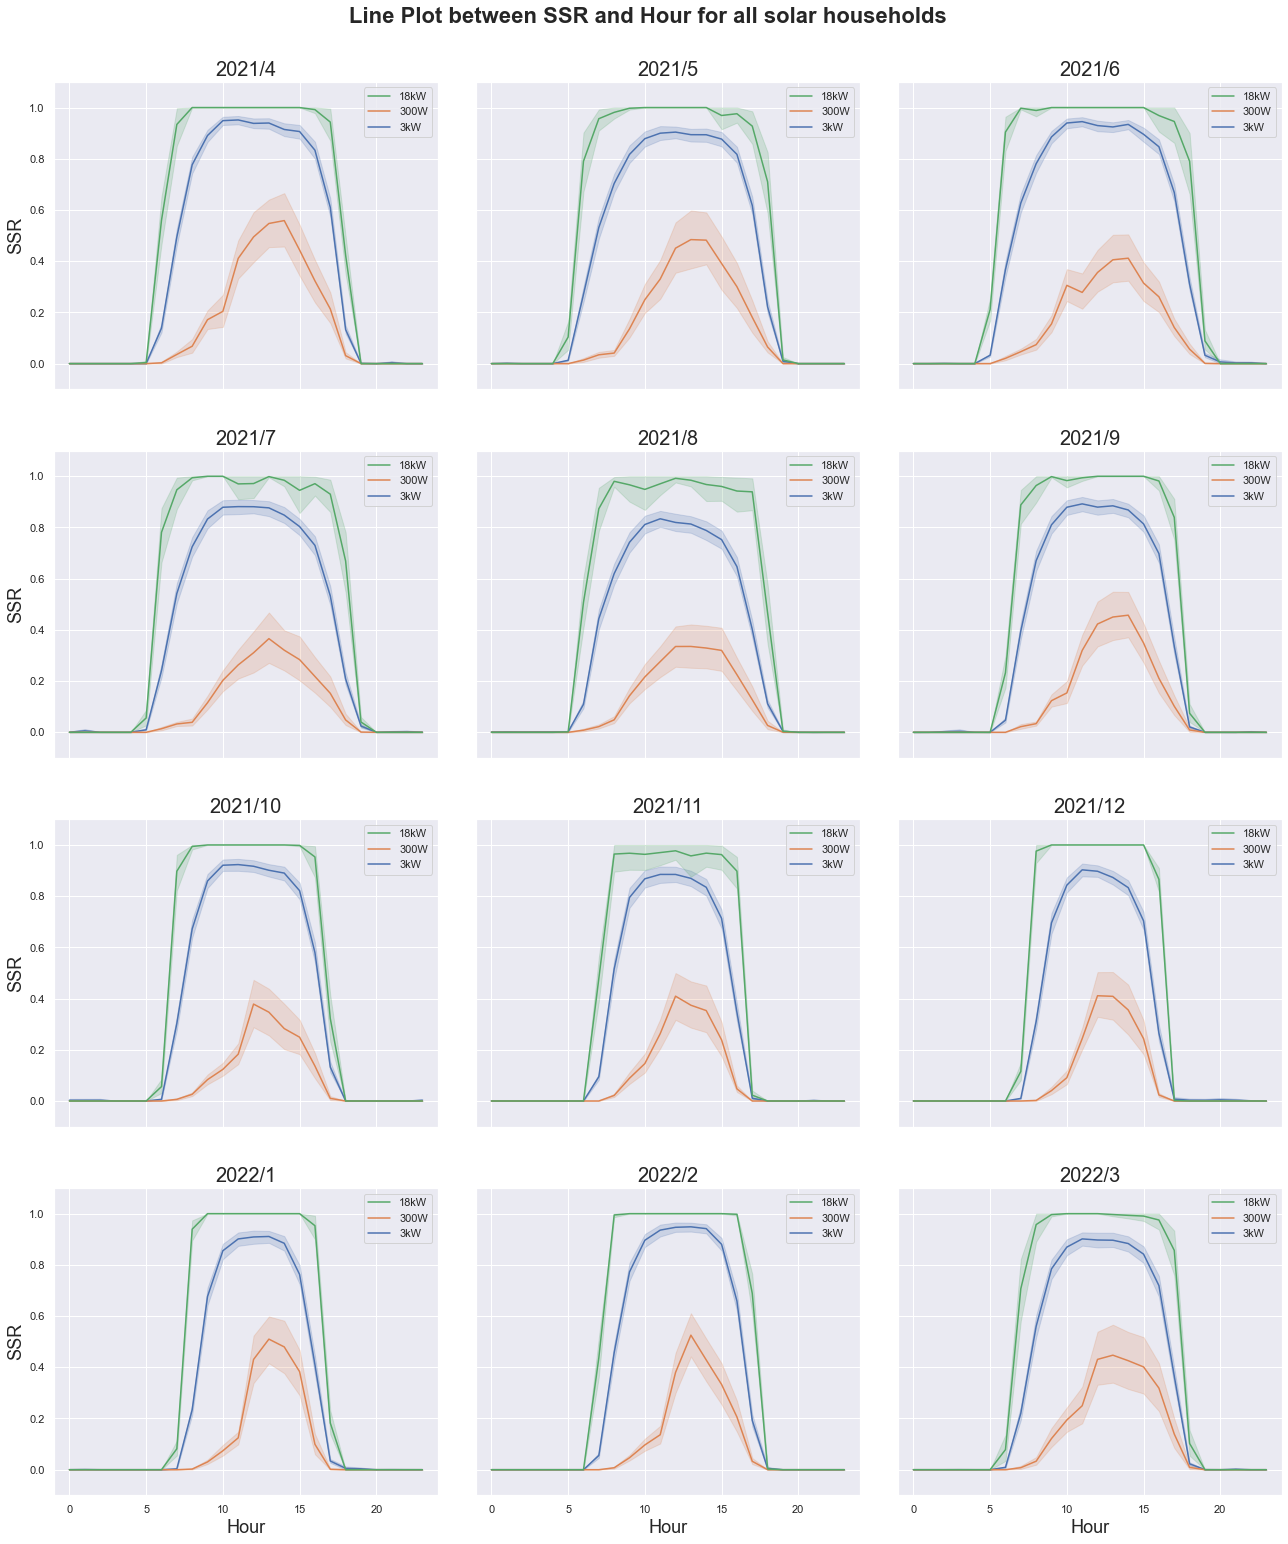

In [19]:
lineplot_use_all3('시간', '자가공급률', 'Hour', 'SSR', -1.0, 24.0, -0.1, 1.1)

In [33]:
df_all_hour_use.groupby(['ym', '설비용량(kW)']).describe()['자가공급률']

count      mean       std  min  25%       50%       75%  \
ym      설비용량(kW)                                                             
2021/10 18kW       744.0  0.425886  0.483503  0.0  0.0  0.000000  1.000000   
        300W       743.0  0.076203  0.159221  0.0  0.0  0.000000  0.074713   
        3kW       5803.0  0.330853  0.426913  0.0  0.0  0.000000  0.874911   
2021/11 18kW       720.0  0.380363  0.469546  0.0  0.0  0.000000  1.000000   
        300W       720.0  0.080932  0.172364  0.0  0.0  0.000000  0.062457   
        3kW       5646.0  0.284559  0.409581  0.0  0.0  0.000000  0.697405   
2021/12 18kW       742.0  0.372948  0.475133  0.0  0.0  0.000000  1.000000   
        300W       742.0  0.075961  0.172483  0.0  0.0  0.000000  0.041694   
        3kW       5819.0  0.265001  0.397615  0.0  0.0  0.000000  0.581742   
2021/3  18kW       744.0  0.451976  0.486077  0.0  0.0  0.062199  1.000000   
        3kW       4225.0  0.363731  0.441796  0.0  0.0  0.000000  0.956521   
2021/4  18kW       720.0  0.493986  0.482158  0.0  0.0  0.449728  1.000000   
        300W       566.0  0.148095  0.236217  0.0  0.0  0.000000  0.232117   
        3kW       5641.0  0.393295  0.444730  0.0  0.0  0.072446  0.969203   
2021/5  18kW       744.0  0.517711  0.485716  0.0  0.0  0.773526  1.000000   
        300W       744.0  0.131601  0.230701  0.0  0.0  0.000000  0.149990   
        3kW       5805.0  0.388935  0.434419  0.0  0.0  0.111059  0.938284   
2021/6  18kW       706.0  0.541161  0.483248  0.0  0.0  1.000000  1.000000   
        300W       717.0  0.116909  0.191106  0.0  0.0  0.012661  0.153842   
        3kW       5583.0  0.420778  0.440232  0.0  0.0  0.204036  0.958294   
2021/7  18kW       732.0  0.515535  0.483868  0.0  0.0  0.787461  1.000000   
        300W       690.0  0.098876  0.173060  0.0  0.0  0.005887  0.128682   
        3kW       5739.0  0.375927  0.424887  0.0  0.0  0.100092  0.891519   
2021/8  18kW       731.0  0.484597  0.479431  0.0  0.0  0.400244  1.000000   
        300W       744.0  0.100518  0.174798  0.0  0.0  0.000000  0.129366   
        3kW       5804.0  0.326187  0.404691  0.0  0.0  0.023833  0.759812   
2021/9  18kW       719.0  0.455730  0.481671  0.0  0.0  0.088963  1.000000   
        300W       719.0  0.110114  0.198511  0.0  0.0  0.000000  0.123862   
        3kW       5625.0  0.342454  0.423647  0.0  0.0  0.008273  0.855933   
2022/1  18kW       743.0  0.382023  0.474526  0.0  0.0  0.000000  1.000000   
        300W       744.0  0.088947  0.202591  0.0  0.0  0.000000  0.041271   
        3kW       5803.0  0.271517  0.403833  0.0  0.0  0.000000  0.640342   
2022/2  18kW       672.0  0.421700  0.477826  0.0  0.0  0.000000  1.000000   
        300W       672.0  0.091366  0.187411  0.0  0.0  0.000000  0.079249   
        3kW       5269.0  0.319226  0.426341  0.0  0.0  0.000000  0.850646   
2022/3  18kW       743.0  0.444491  0.483047  0.0  0.0  0.000000  1.000000   
        300W       744.0  0.115774  0.225088  0.0  0.0  0.000000  0.120127   
        3kW       5837.0  0.331269  0.426937  0.0  0.0  0.000000  0.866522   
2022/4  18kW       718.0  0.496046  0.482077  0.0  0.0  0.505171  1.000000   
        300W       548.0  0.137465  0.226615  0.0  0.0  0.000000  0.176717   
        3kW       5677.0  0.399297  0.449546  0.0  0.0  0.079427  0.983593   

                       max  
ym      설비용량(kW)            
2021/10 18kW      1.000000  
        300W      1.000000  
        3kW       1.000000  
2021/11 18kW      1.000000  
        300W      0.899911  
        3kW       1.000000  
2021/12 18kW      1.000000  
        300W      1.000000  
        3kW       1.000000  
2021/3  18kW      1.000000  
        3kW       1.000000  
2021/4  18kW      1.000000  
        300W      1.000000  
        3kW       1.000000  
2021/5  18kW      1.000000  
        300W      1.000000  
        3kW       1.000000  
2021/6  18kW      1.000000  
        300W      0.944715  
        3kW       1.000000  
2021/7  18kW      1.000000